# Big Data Mart Sales Problem

Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Bigdatamart_Train.csv

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Bigdatamart_Train.csv')
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [3]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
df.sample(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
4571           FDK24        9.195          Low Fat         0.101500   
3825           FDK32          NaN          Regular         0.048738   
3913           FDA32       14.000          Low Fat         0.030217   
772            DRC12       17.850          Low Fat         0.038041   
6638           FDG50        7.405          Low Fat         0.015296   

                  Item_Type  Item_MRP Outlet_Identifier  \
4571           Baking Goods   45.2744            OUT045   
3825  Fruits and Vegetables  152.8682            OUT027   
3913  Fruits and Vegetables  216.6192            OUT018   
772             Soft Drinks  189.1188            OUT017   
6638                 Canned   89.7146            OUT049   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
4571                       2002         NaN               Tier 2   
3825                       1985      Medium               Tier 3   
3913                       2009      Medium               Tier 3   
772                        2007         NaN               Tier 2   
6638                       1999      Medium               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
4571  Supermarket Type1           679.1160  
3825  Supermarket Type3          5031.4506  
3913  Supermarket Type2          3020.0688  
772   Supermarket Type1          3237.1196  
6638  Supermarket Type1           547.2876

In [6]:
df.tail()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
8518         Snack Foods  214.5218            OUT013   
8519        Baking Goods  108.1570            OUT045   
8520  Health and Hygiene   85.1224            OUT035   
8521         Snack Foods  103.1332            OUT018   
8522         Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700

# Checking Null Values

In [7]:
df.isnull()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               False        False             False            False   
1               False        False             False            False   
2               False        False             False            False   
3               False        False             False            False   
4               False        False             False            False   
...               ...          ...               ...              ...   
8518            False        False             False            False   
8519            False        False             False            False   
8520            False        False             False            False   
8521            False        False             False            False   
8522            False        False             False            False   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0         False     False              False                      False   
1         False     False              False                      False   
2         False     False              False                      False   
3         False     False              False                      False   
4         False     False              False                      False   
...         ...       ...                ...                        ...   
8518      False     False              False                      False   
8519      False     False              False                      False   
8520      False     False              False                      False   
8521      False     False              False                      False   
8522      False     False              False                      False   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0           False                 False        False              False  
1           False                 False        False              False  
2           False                 False        False              False  
3            True                 False        False              False  
4           False                 False        False              False  
...           ...                   ...          ...                ...  
8518        False                 False        False              False  
8519         True                 False        False              False  
8520        False                 False        False              False  
8521        False                 False        False              False  
8522        False                 False        False              False  

[8523 rows x 12 columns]

<AxesSubplot:>

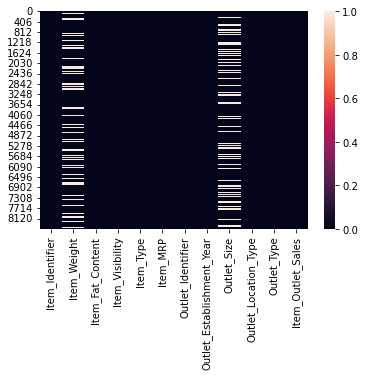

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

It shows Item_weight and Outlet_Size having null values.

We can fill continuous values with mean, and categorical values with mode.

In [10]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

We should fill Item_weight with mean of the column.

In [11]:
print(df['Outlet_Size'].mode())

0    Medium
Name: Outlet_Size, dtype: object


Here we are finding mode for the column Outlet_Size.

In [12]:
print(df['Outlet_Size'].mode()[0])

Medium


Here we are filling null values with mode values.

In [13]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

# Checking Null Values again

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

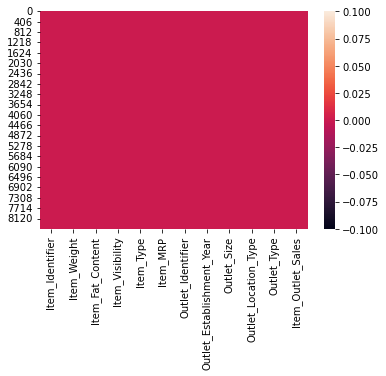

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.isnull().sum().sum()

0

# DataFrame Description

The dataset contains the data of Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales.

Item_Outlet_Sales is the target variable.

# Encoding

In [17]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Here we are having more columns with the categorical type of values. So we must do label encoding.

In [18]:
le=LabelEncoder()
df['Item_Identifier']=le.fit_transform(df['Item_Identifier'])
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0                 156        9.300          Low Fat         0.016047   
1                   8        5.920          Regular         0.019278   
2                 662       17.500          Low Fat         0.016760   
3                1121       19.200          Regular         0.000000   
4                1297        8.930          Low Fat         0.000000   
...               ...          ...              ...              ...   
8518              370        6.865          Low Fat         0.056783   
8519              897        8.380          Regular         0.046982   
8520             1357       10.600          Low Fat         0.035186   
8521              681        7.210          Regular         0.145221   
8522               50       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [19]:
le=LabelEncoder()
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [20]:
le=LabelEncoder()
df['Item_Type']=le.fit_transform(df['Item_Type'])
df

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092            OUT049                       1999   
1            14   48.2692            OUT018                       2009   
2            10  141.6180            OUT049                       1999   
3             6  182.0950            OUT010                       1998   
4             9   53.8614            OUT013                       1987   
...         ...       ...               ...                        ...   
8518         13  214.5218            OUT013                       1987   
8519          0  108.1570            OUT045                       2002   
8520          8   85.1224            OUT035                       2004   
8521         13  103.1332            OUT018                       2009   
8522         14   75.4670            OUT046                       1997   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0         Medium               Tier 1  Supermarket Type1          3735.1380  
1         Medium               Tier 3  Supermarket Type2           443.4228  
2         Medium               Tier 1  Supermarket Type1          2097.2700  
3         Medium               Tier 3      Grocery Store           732.3800  
4           High               Tier 3  Supermarket Type1           994.7052  
...          ...                  ...                ...                ...  
8518        High               Tier 3  Supermarket Type1          2778.3834  
8519      Medium               Tier 2  Supermarket Type1           549.2850  
8520       Small               Tier 2  Supermarket Type1          1193.1136  
8521      Medium               Tier 3  Supermarket Type2          1845.5976  
8522       Small               Tier 1  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [21]:
le=LabelEncoder()
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                       1999   
1            14   48.2692                  3                       2009   
2            10  141.6180                  9                       1999   
3             6  182.0950                  0                       1998   
4             9   53.8614                  1                       1987   
...         ...       ...                ...                        ...   
8518         13  214.5218                  1                       1987   
8519          0  108.1570                  7                       2002   
8520          8   85.1224                  6                       2004   
8521         13  103.1332                  3                       2009   
8522         14   75.4670                  8                       1997   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0         Medium               Tier 1  Supermarket Type1          3735.1380  
1         Medium               Tier 3  Supermarket Type2           443.4228  
2         Medium               Tier 1  Supermarket Type1          2097.2700  
3         Medium               Tier 3      Grocery Store           732.3800  
4           High               Tier 3  Supermarket Type1           994.7052  
...          ...                  ...                ...                ...  
8518        High               Tier 3  Supermarket Type1          2778.3834  
8519      Medium               Tier 2  Supermarket Type1           549.2850  
8520       Small               Tier 2  Supermarket Type1          1193.1136  
8521      Medium               Tier 3  Supermarket Type2          1845.5976  
8522       Small               Tier 1  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [22]:
le=LabelEncoder()
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                       1999   
1            14   48.2692                  3                       2009   
2            10  141.6180                  9                       1999   
3             6  182.0950                  0                       1998   
4             9   53.8614                  1                       1987   
...         ...       ...                ...                        ...   
8518         13  214.5218                  1                       1987   
8519          0  108.1570                  7                       2002   
8520          8   85.1224                  6                       2004   
8521         13  103.1332                  3                       2009   
8522         14   75.4670                  8                       1997   

      Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               1               Tier 1  Supermarket Type1          3735.1380  
1               1               Tier 3  Supermarket Type2           443.4228  
2               1               Tier 1  Supermarket Type1          2097.2700  
3               1               Tier 3      Grocery Store           732.3800  
4               0               Tier 3  Supermarket Type1           994.7052  
...           ...                  ...                ...                ...  
8518            0               Tier 3  Supermarket Type1          2778.3834  
8519            1               Tier 2  Supermarket Type1           549.2850  
8520            2               Tier 2  Supermarket Type1          1193.1136  
8521            1               Tier 3  Supermarket Type2          1845.5976  
8522            2               Tier 1  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [23]:
le=LabelEncoder()
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                       1999   
1            14   48.2692                  3                       2009   
2            10  141.6180                  9                       1999   
3             6  182.0950                  0                       1998   
4             9   53.8614                  1                       1987   
...         ...       ...                ...                        ...   
8518         13  214.5218                  1                       1987   
8519          0  108.1570                  7                       2002   
8520          8   85.1224                  6                       2004   
8521         13  103.1332                  3                       2009   
8522         14   75.4670                  8                       1997   

      Outlet_Size  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               1                     0  Supermarket Type1          3735.1380  
1               1                     2  Supermarket Type2           443.4228  
2               1                     0  Supermarket Type1          2097.2700  
3               1                     2      Grocery Store           732.3800  
4               0                     2  Supermarket Type1           994.7052  
...           ...                   ...                ...                ...  
8518            0                     2  Supermarket Type1          2778.3834  
8519            1                     1  Supermarket Type1           549.2850  
8520            2                     1  Supermarket Type1          1193.1136  
8521            1                     2  Supermarket Type2          1845.5976  
8522            2                     0  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [24]:
le=LabelEncoder()
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])
df

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                       1999   
1            14   48.2692                  3                       2009   
2            10  141.6180                  9                       1999   
3             6  182.0950                  0                       1998   
4             9   53.8614                  1                       1987   
...         ...       ...                ...                        ...   
8518         13  214.5218                  1                       1987   
8519          0  108.1570                  7                       2002   
8520          8   85.1224                  6                       2004   
8521         13  103.1332                  3                       2009   
8522         14   75.4670                  8                       1997   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0               1                     0            1          3735.1380  
1               1                     2            2           443.4228  
2               1                     0            1          2097.2700  
3               1                     2            0           732.3800  
4               0                     2            1           994.7052  
...           ...                   ...          ...                ...  
8518            0                     2            1          2778.3834  
8519            1                     1            1           549.2850  
8520            2                     1            1          1193.1136  
8521            1                     2            2          1845.5976  
8522            2                     0            1           765.6700  

[8523 rows x 12 columns]

In [25]:
df.shape

(8523, 12)

# Summary Statistics

In [26]:
df.describe()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
count      8523.000000  8523.000000       8523.000000      8523.000000   
mean        779.714889    12.857645          1.369354         0.066132   
std         449.222377     4.226124          0.644810         0.051598   
min           0.000000     4.555000          0.000000         0.000000   
25%         395.500000     9.310000          1.000000         0.026989   
50%         783.000000    12.857645          1.000000         0.053931   
75%        1167.000000    16.000000          2.000000         0.094585   
max        1558.000000    21.350000          4.000000         0.328391   

         Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
count  8523.000000  8523.000000        8523.000000                8523.000000   
mean      7.226681   140.992782           4.722281                1997.831867   
std       4.209990    62.275067           2.837201                   8.371760   
min       0.000000    31.290000           0.000000                1985.000000   
25%       4.000000    93.826500           2.000000                1987.000000   
50%       6.000000   143.012800           5.000000                1999.000000   
75%      10.000000   185.643700           7.000000                2004.000000   
max      15.000000   266.888400           9.000000                2009.000000   

       Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
count  8523.000000           8523.000000  8523.000000        8523.000000  
mean      1.170832              1.112871     1.201220        2181.288914  
std       0.600327              0.812757     0.796459        1706.499616  
min       0.000000              0.000000     0.000000          33.290000  
25%       1.000000              0.000000     1.000000         834.247400  
50%       1.000000              1.000000     1.000000        1794.331000  
75%       2.000000              2.000000     1.000000        3101.296400  
max       2.000000              2.000000     3.000000       13086.964800

In [27]:
df.describe().transpose()

count         mean          std       min  \
Item_Identifier            8523.0   779.714889   449.222377     0.000   
Item_Weight                8523.0    12.857645     4.226124     4.555   
Item_Fat_Content           8523.0     1.369354     0.644810     0.000   
Item_Visibility            8523.0     0.066132     0.051598     0.000   
Item_Type                  8523.0     7.226681     4.209990     0.000   
Item_MRP                   8523.0   140.992782    62.275067    31.290   
Outlet_Identifier          8523.0     4.722281     2.837201     0.000   
Outlet_Establishment_Year  8523.0  1997.831867     8.371760  1985.000   
Outlet_Size                8523.0     1.170832     0.600327     0.000   
Outlet_Location_Type       8523.0     1.112871     0.812757     0.000   
Outlet_Type                8523.0     1.201220     0.796459     0.000   
Item_Outlet_Sales          8523.0  2181.288914  1706.499616    33.290   

                                   25%          50%          75%           max  
Item_Identifier             395.500000   783.000000  1167.000000   1558.000000  
Item_Weight                   9.310000    12.857645    16.000000     21.350000  
Item_Fat_Content              1.000000     1.000000     2.000000      4.000000  
Item_Visibility               0.026989     0.053931     0.094585      0.328391  
Item_Type                     4.000000     6.000000    10.000000     15.000000  
Item_MRP                     93.826500   143.012800   185.643700    266.888400  
Outlet_Identifier             2.000000     5.000000     7.000000      9.000000  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000   2009.000000  
Outlet_Size                   1.000000     1.000000     2.000000      2.000000  
Outlet_Location_Type          0.000000     1.000000     2.000000      2.000000  
Outlet_Type                   1.000000     1.000000     1.000000      3.000000  
Item_Outlet_Sales           834.247400  1794.331000  3101.296400  13086.964800

# Plottings

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

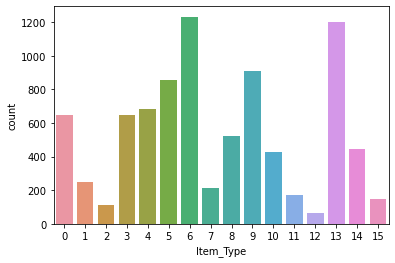

In [28]:
sns.countplot(df['Item_Type'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

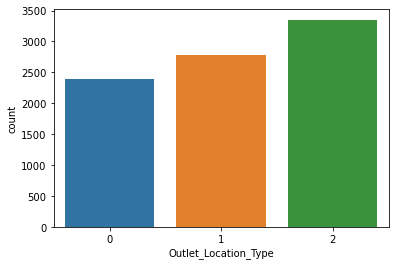

In [29]:
sns.countplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

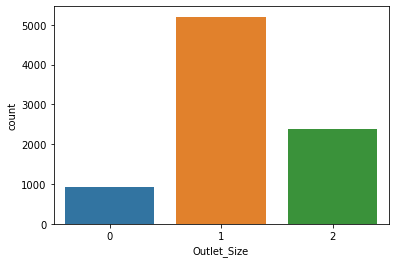

In [30]:
sns.countplot(df['Outlet_Size'])

It shows majority of outlet_size is 1.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

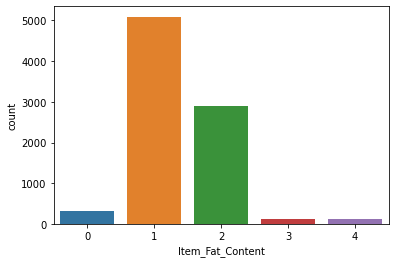

In [31]:
sns.countplot(df['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Identifier', ylabel='Count'>

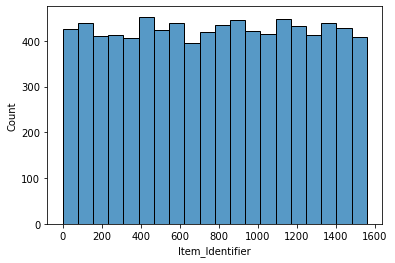

In [32]:
sns.histplot(df['Item_Identifier'], bins=20)

Item_Identifier ranges from 0 to nearly 1600

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

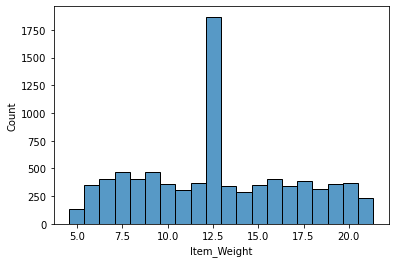

In [33]:
sns.histplot(df['Item_Weight'], bins=20)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Count'>

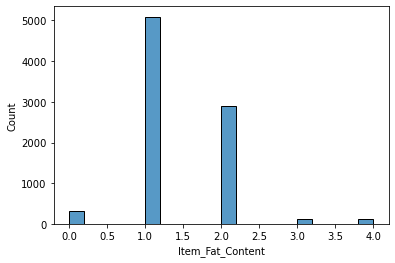

In [34]:
sns.histplot(df['Item_Fat_Content'], bins=20)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

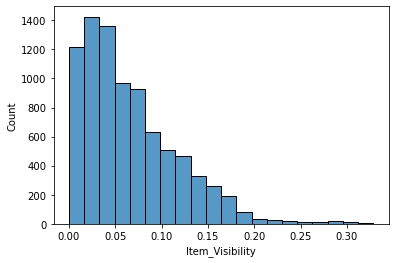

In [35]:
sns.histplot(df['Item_Visibility'], bins=20)

<AxesSubplot:xlabel='Item_Type', ylabel='Count'>

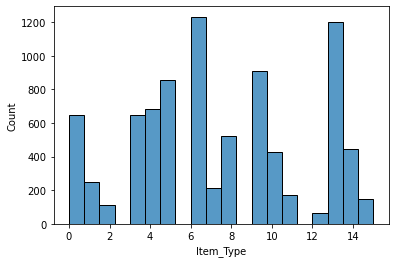

In [36]:
sns.histplot(df['Item_Type'], bins=20)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Count'>

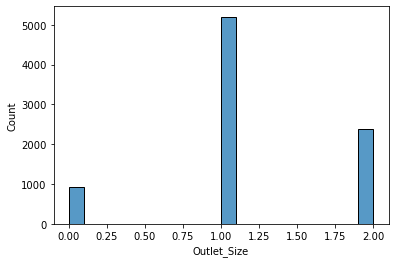

In [37]:
sns.histplot(df['Outlet_Size'], bins=20)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Count'>

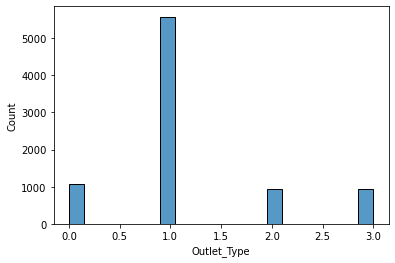

In [38]:
sns.histplot(df['Outlet_Type'], bins=20)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

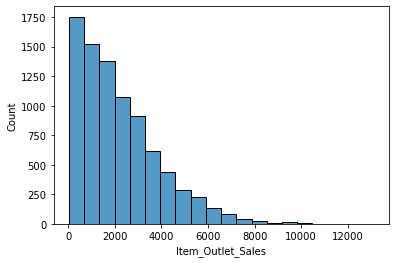

In [39]:
sns.histplot(df['Item_Outlet_Sales'], bins=20)

<AxesSubplot:xlabel='Item_Type', ylabel='Outlet_Size'>

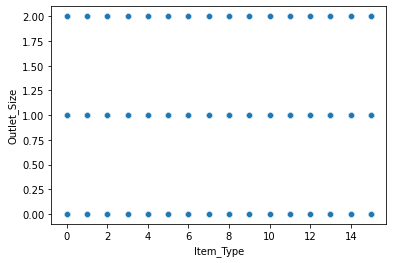

In [40]:
sns.scatterplot(x='Item_Type', y='Outlet_Size',data=df)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Outlet_Identifier'>

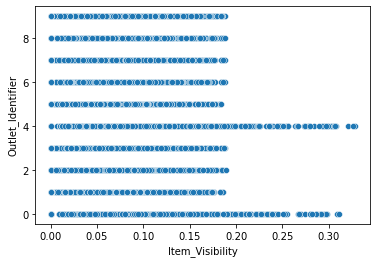

In [41]:
sns.scatterplot(x='Item_Visibility', y='Outlet_Identifier',data=df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Type'>

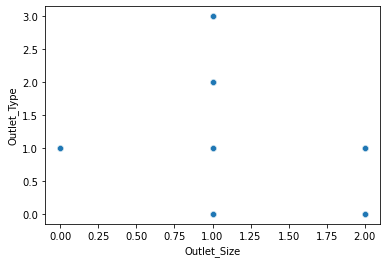

In [42]:
sns.scatterplot(x='Outlet_Size', y='Outlet_Type',data=df)

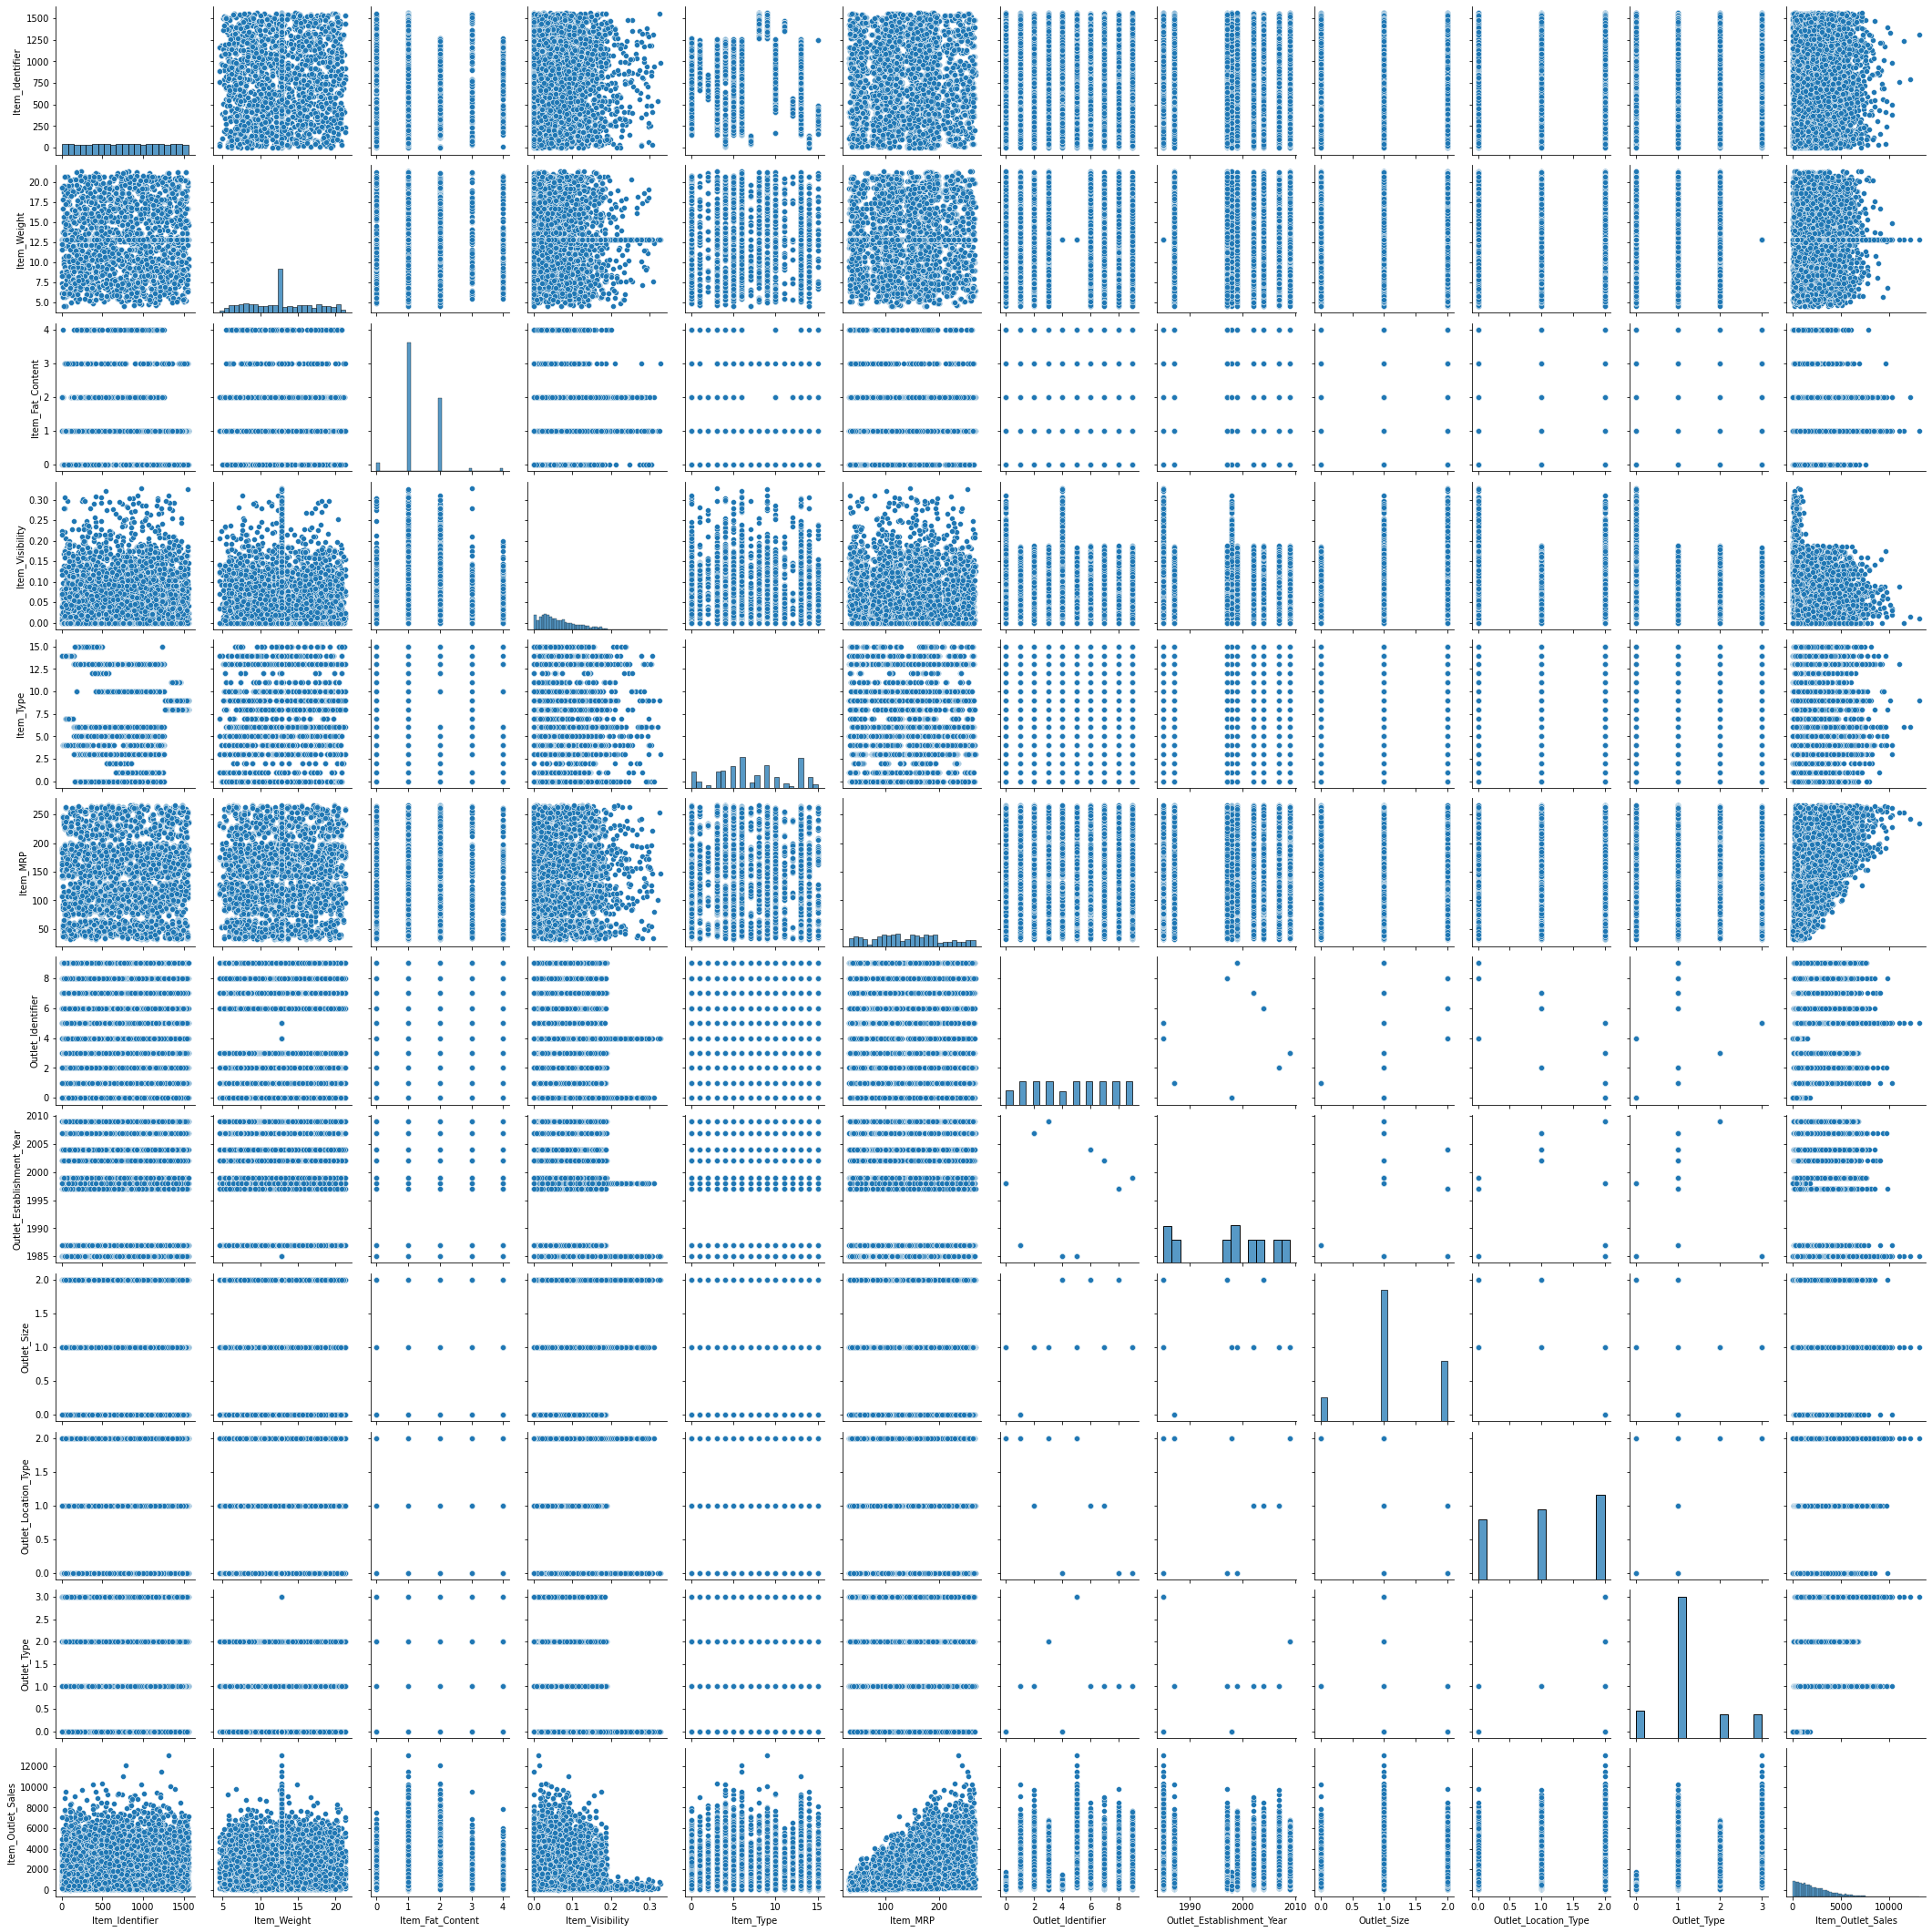

In [43]:
sns.pairplot(df)

# Skewness

In [44]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

# Outliers Check

<AxesSubplot:>

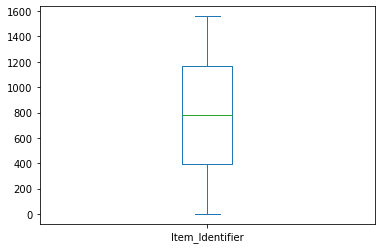

In [45]:
df['Item_Identifier'].plot.box()

No outliers are present in Item_Itendifier.

<AxesSubplot:>

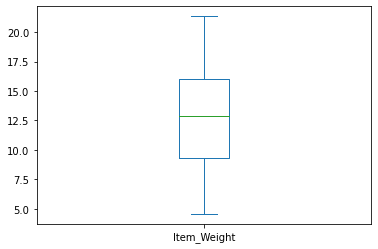

In [46]:
df['Item_Weight'].plot.box()

<AxesSubplot:>

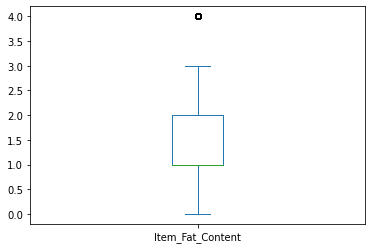

In [47]:
df['Item_Fat_Content'].plot.box()

Outliers are present in the Item_Fat_Content.

<AxesSubplot:>

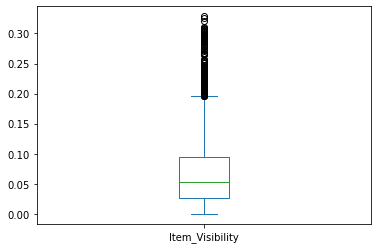

In [48]:
df['Item_Visibility'].plot.box()

Outliers are present.

<AxesSubplot:>

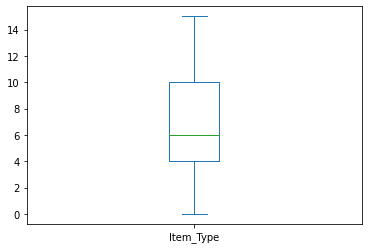

In [49]:
df['Item_Type'].plot.box()

<AxesSubplot:>

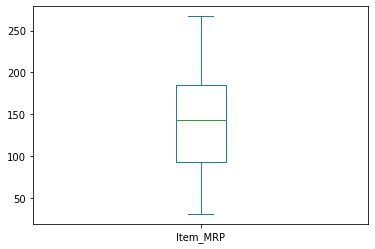

In [50]:
df['Item_MRP'].plot.box()

<AxesSubplot:>

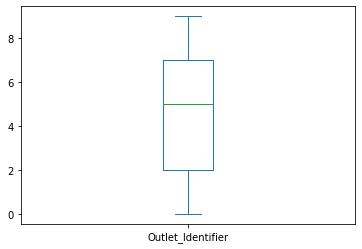

In [51]:
df['Outlet_Identifier'].plot.box()

<AxesSubplot:>

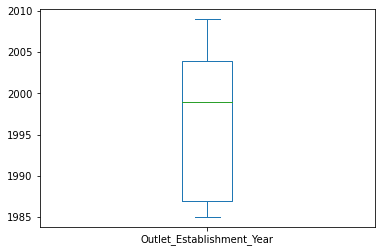

In [52]:
df['Outlet_Establishment_Year'].plot.box()

<AxesSubplot:>

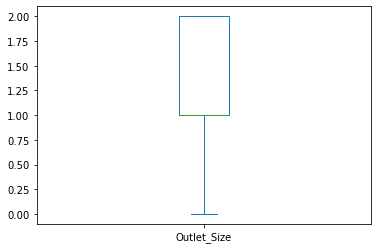

In [53]:
df['Outlet_Size'].plot.box()

<AxesSubplot:>

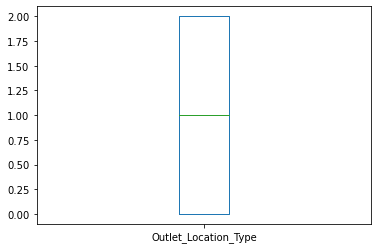

In [54]:
df['Outlet_Location_Type'].plot.box()

<AxesSubplot:>

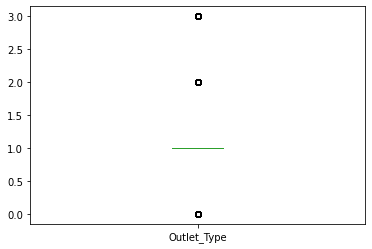

In [55]:
df['Outlet_Type'].plot.box()

<AxesSubplot:>

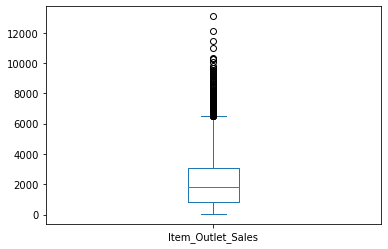

In [56]:
df['Item_Outlet_Sales'].plot.box()

# Removing Outliers

In [57]:
from scipy.stats import zscore

dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [58]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (8222, 12)


In [59]:
df

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                       1999   
1            14   48.2692                  3                       2009   
2            10  141.6180                  9                       1999   
3             6  182.0950                  0                       1998   
4             9   53.8614                  1                       1987   
...         ...       ...                ...                        ...   
8518         13  214.5218                  1                       1987   
8519          0  108.1570                  7                       2002   
8520          8   85.1224                  6                       2004   
8521         13  103.1332                  3                       2009   
8522         14   75.4670                  8                       1997   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0               1                     0            1          3735.1380  
1               1                     2            2           443.4228  
2               1                     0            1          2097.2700  
3               1                     2            0           732.3800  
4               0                     2            1           994.7052  
...           ...                   ...          ...                ...  
8518            0                     2            1          2778.3834  
8519            1                     1            1           549.2850  
8520            2                     1            1          1193.1136  
8521            1                     2            2          1845.5976  
8522            2                     0            1           765.6700  

[8222 rows x 12 columns]

In [60]:
df.shape

(8222, 12)

Totally 301 rows are deleted.

# Correlation of the columns with target variable

In [61]:
df.corr()

Item_Identifier  Item_Weight  Item_Fat_Content  \
Item_Identifier                   1.000000     0.047694         -0.100506   
Item_Weight                       0.047694     1.000000         -0.019195   
Item_Fat_Content                 -0.100506    -0.019195          1.000000   
Item_Visibility                  -0.027133    -0.009853          0.039216   
Item_Type                        -0.014391     0.027716         -0.126249   
Item_MRP                          0.015797     0.024458          0.002854   
Outlet_Identifier                -0.009863    -0.009720          0.001118   
Outlet_Establishment_Year        -0.013171    -0.009266         -0.010542   
Outlet_Size                       0.001973    -0.008281         -0.008840   
Outlet_Location_Type              0.002105     0.005994         -0.004478   
Outlet_Type                      -0.004554    -0.002089          0.000706   
Item_Outlet_Sales                 0.005764     0.010351          0.020618   

                           Item_Visibility  Item_Type  Item_MRP  \
Item_Identifier                  -0.027133  -0.014391  0.015797   
Item_Weight                      -0.009853   0.027716  0.024458   
Item_Fat_Content                  0.039216  -0.126249  0.002854   
Item_Visibility                   1.000000  -0.036583  0.001472   
Item_Type                        -0.036583   1.000000  0.031041   
Item_MRP                          0.001472   0.031041  1.000000   
Outlet_Identifier                -0.070419   0.003481 -0.001717   
Outlet_Establishment_Year        -0.044140   0.007952  0.019437   
Outlet_Size                       0.045678   0.001253  0.006314   
Outlet_Location_Type             -0.015106  -0.000275 -0.004097   
Outlet_Type                      -0.119910   0.000651 -0.022156   
Item_Outlet_Sales                -0.092554   0.015589  0.568176   

                           Outlet_Identifier  Outlet_Establishment_Year  \
Item_Identifier                    -0.009863                  -0.013171   
Item_Weight                        -0.009720                  -0.009266   
Item_Fat_Content                    0.001118                  -0.010542   
Item_Visibility                    -0.070419                  -0.044140   
Item_Type                           0.003481                   0.007952   
Item_MRP                           -0.001717                   0.019437   
Outlet_Identifier                   1.000000                   0.080153   
Outlet_Establishment_Year           0.080153                   1.000000   
Outlet_Size                         0.511577                   0.207683   
Outlet_Location_Type               -0.723597                  -0.093957   
Outlet_Type                         0.087083                  -0.120397   
Item_Outlet_Sales                   0.162516                  -0.024280   

                           Outlet_Size  Outlet_Location_Type  Outlet_Type  \
Item_Identifier               0.001973              0.002105    -0.004554   
Item_Weight                  -0.008281              0.005994    -0.002089   
Item_Fat_Content             -0.008840             -0.004478     0.000706   
Item_Visibility               0.045678             -0.015106    -0.119910   
Item_Type                     0.001253             -0.000275     0.000651   
Item_MRP                      0.006314             -0.004097    -0.022156   
Outlet_Identifier             0.511577             -0.723597     0.087083   
Outlet_Establishment_Year     0.207683             -0.093957    -0.120397   
Outlet_Size                   1.000000             -0.611339    -0.194481   
Outlet_Location_Type         -0.611339              1.000000     0.467156   
Outlet_Type                  -0.194481              0.467156     1.000000   
Item_Outlet_Sales            -0.078753              0.069131     0.369614   

                           Item_Outlet_Sales  
Item_Identifier                     0.005764  
Item_Weight                         0.010351  
Item_Fat_Content                  

<AxesSubplot:>

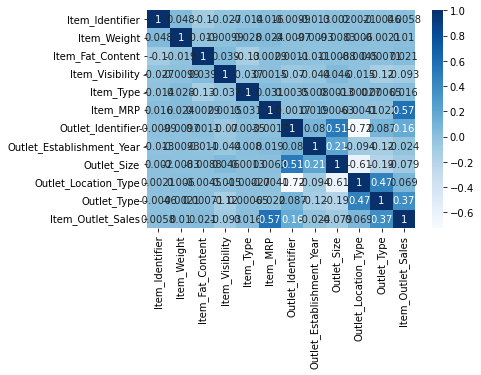

In [62]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

# Scaling Technique

In [63]:
features = df.drop(columns = ['Item_Outlet_Sales'])
features

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                       1999   
1            14   48.2692                  3                       2009   
2            10  141.6180                  9                       1999   
3             6  182.0950                  0                       1998   
4             9   53.8614                  1                       1987   
...         ...       ...                ...                        ...   
8518         13  214.5218                  1                       1987   
8519          0  108.1570                  7                       2002   
8520          8   85.1224                  6                       2004   
8521         13  103.1332                  3                       2009   
8522         14   75.4670                  8                       1997   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0               1                     0            1  
1               1                     2            2  
2               1                     0            1  
3               1                     2            0  
4               0                     2            1  
...           ...                   ...          ...  
8518            0                     2            1  
8519            1                     1            1  
8520            2                     1            1  
8521            1                     2            2  
8522            2                     0            1  

[8222 rows x 11 columns]

In [64]:
target= df['Item_Outlet_Sales']
target

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8222, dtype: float64

In [65]:
features.shape

(8222, 11)

In [66]:
len(features)

8222

In [67]:
len(target)

8222

In [68]:
scale=StandardScaler()
features_scale=scale.fit_transform(features)
features_scale

array([[-1.38525904, -0.83758301, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.26058572],
       [-1.71298557, -1.6325653 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.01930425],
       [-0.26478859,  1.09107226, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.26058572],
       ...,
       [ 1.2741975 , -0.53182058, -0.58389405, ...,  1.3809534 ,
        -0.13578784, -0.26058572],
       [-0.22271559, -1.3291549 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.01930425],
       [-1.6199821 ,  0.45602723, -0.58389405, ...,  1.3809534 ,
        -1.37079631, -0.26058572]])

In [69]:
features_scale.shape

(8222, 11)

In [70]:
features_scale

array([[-1.38525904, -0.83758301, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.26058572],
       [-1.71298557, -1.6325653 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.01930425],
       [-0.26478859,  1.09107226, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.26058572],
       ...,
       [ 1.2741975 , -0.53182058, -0.58389405, ...,  1.3809534 ,
        -0.13578784, -0.26058572],
       [-0.22271559, -1.3291549 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.01930425],
       [-1.6199821 ,  0.45602723, -0.58389405, ...,  1.3809534 ,
        -1.37079631, -0.26058572]])

In [71]:
features_scale=features

In [72]:
features

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                       1999   
1            14   48.2692                  3                       2009   
2            10  141.6180                  9                       1999   
3             6  182.0950                  0                       1998   
4             9   53.8614                  1                       1987   
...         ...       ...                ...                        ...   
8518         13  214.5218                  1                       1987   
8519          0  108.1570                  7                       2002   
8520          8   85.1224                  6                       2004   
8521         13  103.1332                  3                       2009   
8522         14   75.4670                  8                       1997   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0               1                     0            1  
1               1                     2            2  
2               1                     0            1  
3               1                     2            0  
4               0                     2            1  
...           ...                   ...          ...  
8518            0                     2            1  
8519            1                     1            1  
8520            2                     1            1  
8521            1                     2            2  
8522            2                     0            1  

[8222 rows x 11 columns]

In [73]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

Train the model

In [74]:
features_train.shape

(6577, 11)

In [75]:
target_train.shape

(6577,)

In [76]:
features_test.shape

(1645, 11)

In [77]:
target_test.shape

(1645,)

# Linear Regression

In [78]:
lr=LinearRegression()
lr.fit(features_train,target_train)
lr.coef_

array([ 2.57800750e-02, -2.95250707e+00,  5.44490465e+01, -1.15110477e+03,
        2.03030085e-01,  1.48330613e+01,  5.81001259e+01,  4.48032733e+00,
       -3.60902398e+02, -2.48589948e+02,  8.06857920e+02])

In [79]:
lr.intercept_

-9419.688181523887

In [80]:
lr.score(features_train,target_train)

0.49775318140586655

In [81]:
pred=lr.predict(features_test)
pred

array([ 734.43990608, 1965.91938036, 2921.37362808, ..., 2600.5657435 ,
       2366.88448451,  435.94941039])

In [82]:
print("Predicted values", pred)

Predicted values [ 734.43990608 1965.91938036 2921.37362808 ... 2600.5657435  2366.88448451
  435.94941039]


In [83]:
preddf=pd.DataFrame(data=pred)
preddf

0
0      734.439906
1     1965.919380
2     2921.373628
3      456.440085
4     2324.428408
...           ...
1640  1595.699615
1641  3228.764345
1642  2600.565744
1643  2366.884485
1644   435.949410

[1645 rows x 1 columns]

In [84]:
lr.score(features_test,target_test)

0.5027822874745717

In [85]:
print("Mean absolute error:", mean_absolute_error(target_test,pred))
print("Mean squared error:", mean_squared_error(target_test,pred))
print("Root mean square:", np.sqrt(mean_squared_error(target_test,pred)))

Mean absolute error: 854.1844786071672
Mean squared error: 1223454.9014755187
Root mean square: 1106.098956457115


In [86]:
print("R2 Score:", r2_score(target_test,pred))

R2 Score: 0.5027822874745717


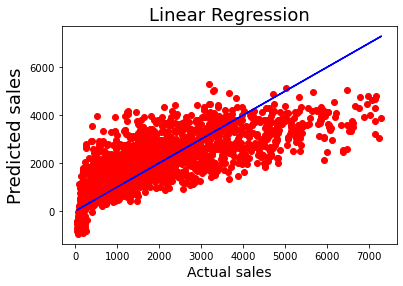

In [87]:
plt.scatter(x=target_test, y=pred, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Linear Regression', fontsize=18)
plt.savefig('lr.png')
plt.show()

In [88]:
# Cross Validation


from sklearn.model_selection import cross_val_score
cv_score = (cross_val_score(lr, features, target, cv=5).mean())*100
print("Cross Validation Score is:", cv_score)


Cross Validation Score is: 49.648675540659575


# Regularization

In [89]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.metrics import r2_score

In [90]:
rdg=Ridge(alpha=.0001,random_state=45)
rdg.fit(features_train,target_train)
rdg.score(features_train,target_train)

0.4977531814058108

In [91]:
rdg.coef_

array([ 2.57800950e-02, -2.95250620e+00,  5.44490271e+01, -1.15109683e+03,
        2.03032346e-01,  1.48330613e+01,  5.81001561e+01,  4.48032999e+00,
       -3.60902420e+02, -2.48589858e+02,  8.06857903e+02])

In [92]:
predict=rdg.predict(features_test)

In [93]:
r2_score(target_test,predict)

0.5027822904579724

In [94]:
lso=Lasso(alpha=.0001,random_state=47)
lso.fit(features_train,target_train)
lso.score(features_train,target_train)

0.49775318140397606

In [95]:
predict1=lso.predict(features_test)

In [96]:
r2_score(target_test,predict1)

0.5027823141161709

# Approaching more Regressors

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

Decision Tree Regression

In [98]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(features_train,target_train)
print('dtc score of DTR:', dtr.score(features_train, target_train))

dtrpredict=dtr.predict(features_test)
print('dtc r2_score:', r2_score(target_test,dtrpredict))

print("Mean absolute error:", mean_absolute_error(target_test,dtrpredict))
print("Mean squared error of dtc = ", mean_squared_error(target_test, dtrpredict))
print("Root Mean Squared error of dtc=", np.sqrt(mean_squared_error(target_test,dtrpredict)))

dtc score of DTR: 1.0
dtc r2_score: 0.1334219524335286
Mean absolute error: 1050.6404948328268
Mean squared error of dtc =  2132303.6832724735
Root Mean Squared error of dtc= 1460.2409675366848


In [99]:
# Cross Validation


from sklearn.model_selection import cross_val_score

score=cross_val_score(dtr,features,target,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.18167942 0.12224937 0.01734756 0.13040704 0.18693503]
0.127723685550805
0.06105286444246039


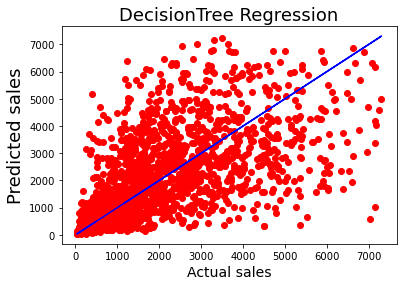

In [100]:
plt.scatter(x=target_test, y=dtrpredict, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('DecisionTree Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

In [101]:
# Cross Validation


from sklearn.model_selection import cross_val_score
cv_score = (cross_val_score(dtr, features, target, cv=5).mean())*100
print("Cross Validation Score is:", cv_score)


Cross Validation Score is: 13.256786205107232


KNeighbour Regression

In [102]:
knr=KNeighborsRegressor()
knr.fit(features_train,target_train)
print('dtc score of KNR:', dtr.score(features_train, target_train))

knrpredict=knr.predict(features_test)
print('dtc r2_score:', r2_score(target_test,knrpredict))

print("Mean absolute error:", mean_absolute_error(target_test,knrpredict))
print("Mean squared error of dtc = ", mean_squared_error(target_test, knrpredict))
print("Root Mean Squared error of dtc=", np.sqrt(mean_squared_error(target_test,knrpredict)))

dtc score of KNR: 1.0
dtc r2_score: 0.1660078681810948
Mean absolute error: 1068.187744899696
Mean squared error of dtc =  2052122.7135762474
Root Mean Squared error of dtc= 1432.5231982680934


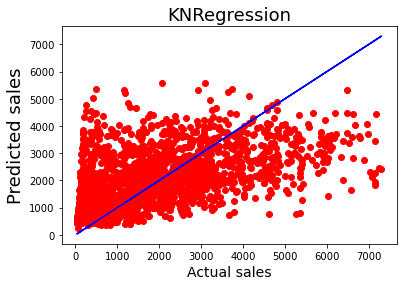

In [103]:
plt.scatter(x=target_test, y=knrpredict, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('KNRegression', fontsize=18)
plt.savefig('knr.png')
plt.show()

In [104]:
# Cross Validation


from sklearn.model_selection import cross_val_score
cv_score = (cross_val_score(knr, features, target, cv=5).mean())*100
print("Cross Validation Score is:", cv_score)


Cross Validation Score is: 19.535072625616884


# Ensemble Technique

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [106]:
rf=RandomForestRegressor(criterion="mae",max_features='auto')
rf.fit(features_train,target_train)
train_r2=rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
print('Training r2',train_r2)

rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)


Training r2 0.9319363353995673
R2 Score: 55.84250787011571


In [107]:
rfscore=(cross_val_score(rf, features_train, target_train, cv=5).mean())*100
print('Cross Val Score:',rfscore)

Cross Val Score: 54.52774859175881


# Saving the best model

In [112]:
import joblib

joblib.dump(rf,'rfmodel.obj')

loaded_model=joblib.load('rfmodel.obj')
loaded_model.predict(features_test)

array([ 667.071678, 1950.034988, 2967.497232, ..., 2118.315938,
       2251.595782,  259.475576])

In [113]:
result=loaded_model.score(features_test,target_test)
print(result*100)

55.84250787011571


In [114]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

0            1            2           3            4     \
Predicted  667.071678  1950.034988  2967.497232  686.533012  2059.665616   
Original   667.071678  1950.034988  2967.497232  686.533012  2059.665616   

                  5           6            7            8            9     \
Predicted  1659.280128  3803.81527  3735.331082  1343.497846  3421.552858   
Original   1659.280128  3803.81527  3735.331082  1343.497846  3421.552858   

           ...        1635      1636         1637        1638        1639  \
Predicted  ...  2587.49854  535.3032  1938.170432  883.177042  384.705898   
Original   ...  2587.49854  535.3032  1938.170432  883.177042  384.705898   

                  1640         1641         1642         1643        1644  
Predicted  2230.709636  3465.415762  2118.315938  2251.595782  259.475576  
Original   2230.709636  3465.415762  2118.315938  2251.595782  259.475576  

[2 rows x 1645 columns]

In [115]:
conclusion.transpose()

Predicted     Original
0      667.071678   667.071678
1     1950.034988  1950.034988
2     2967.497232  2967.497232
3      686.533012   686.533012
4     2059.665616  2059.665616
...           ...          ...
1640  2230.709636  2230.709636
1641  3465.415762  3465.415762
1642  2118.315938  2118.315938
1643  2251.595782  2251.595782
1644   259.475576   259.475576

[1645 rows x 2 columns]

BigdatamartTest.csv

In [145]:
df1=pd.read_csv('Bigdatamart_Test.csv')
df1

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

In [146]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [147]:
df1.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [148]:
df1.sample(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
4471           FDZ02        6.905          Regular         0.038207   
2807           FDK16          NaN          Low Fat         0.201928   
3533           FDP48        7.520          Regular         0.043987   
1829           DRL59       16.750          Low Fat         0.021311   
706            FDT36       12.300          Low Fat         0.111254   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
4471         Dairy   96.1726            OUT049                       1999   
2807  Frozen Foods   93.4094            OUT019                       1985   
3533  Baking Goods  182.2950            OUT013                       1987   
1829   Hard Drinks   52.2298            OUT018                       2009   
706   Baking Goods   36.0874            OUT035                       2004   

     Outlet_Size Outlet_Location_Type        Outlet_Type  
4471      Medium               Tier 1  Supermarket Type1  
2807       Small               Tier 1      Grocery Store  
3533        High               Tier 3  Supermarket Type1  
1829      Medium               Tier 3  Supermarket Type2  
706        Small               Tier 2  Supermarket Type1

In [149]:
df1.tail(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
5676           FDB58         10.5          Regular         0.013496   
5677           FDD47          7.6          Regular         0.142991   
5678           NCO17         10.0          Low Fat         0.073529   
5679           FDJ26         15.3          Regular         0.000000   
5680           FDU37          9.5          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1

# Checking Null Values

In [150]:
df1.isnull()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               False        False             False            False   
1               False        False             False            False   
2               False        False             False            False   
3               False        False             False            False   
4               False         True             False            False   
...               ...          ...               ...              ...   
5676            False        False             False            False   
5677            False        False             False            False   
5678            False        False             False            False   
5679            False        False             False            False   
5680            False        False             False            False   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0         False     False              False                      False   
1         False     False              False                      False   
2         False     False              False                      False   
3         False     False              False                      False   
4         False     False              False                      False   
...         ...       ...                ...                        ...   
5676      False     False              False                      False   
5677      False     False              False                      False   
5678      False     False              False                      False   
5679      False     False              False                      False   
5680      False     False              False                      False   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0           False                 False        False  
1            True                 False        False  
2            True                 False        False  
3            True                 False        False  
4           False                 False        False  
...           ...                   ...          ...  
5676        False                 False        False  
5677        False                 False        False  
5678         True                 False        False  
5679         True                 False        False  
5680         True                 False        False  

[5681 rows x 11 columns]

<AxesSubplot:>

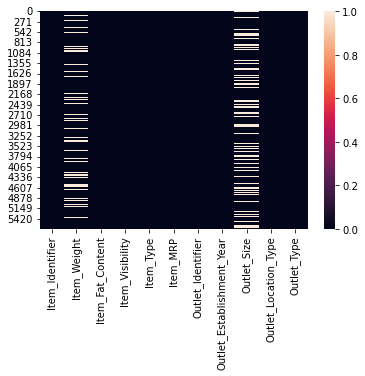

In [151]:
sns.heatmap(df1.isnull())

In [152]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [153]:
df1['Item_Weight'].fillna(df1['Item_Weight'].mean(), inplace=True)

In [154]:
df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0], inplace=True)

In [155]:
df1.isnull()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               False        False             False            False   
1               False        False             False            False   
2               False        False             False            False   
3               False        False             False            False   
4               False        False             False            False   
...               ...          ...               ...              ...   
5676            False        False             False            False   
5677            False        False             False            False   
5678            False        False             False            False   
5679            False        False             False            False   
5680            False        False             False            False   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0         False     False              False                      False   
1         False     False              False                      False   
2         False     False              False                      False   
3         False     False              False                      False   
4         False     False              False                      False   
...         ...       ...                ...                        ...   
5676      False     False              False                      False   
5677      False     False              False                      False   
5678      False     False              False                      False   
5679      False     False              False                      False   
5680      False     False              False                      False   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0           False                 False        False  
1           False                 False        False  
2           False                 False        False  
3           False                 False        False  
4           False                 False        False  
...           ...                   ...          ...  
5676        False                 False        False  
5677        False                 False        False  
5678        False                 False        False  
5679        False                 False        False  
5680        False                 False        False  

[5681 rows x 11 columns]

<AxesSubplot:>

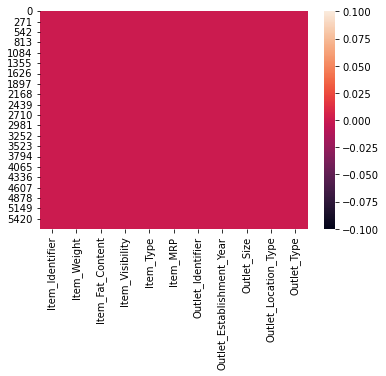

In [156]:
sns.heatmap(df1.isnull())

In [248]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [158]:
df1.isnull().sum().sum()

0

# DataFrame Description

The dataset contains the data of Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type.

Item_Outlet_Sales is the target variable, here target variable is not given.

# Checking the datatypes of the columns

In [159]:
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

# Encoding

In [164]:
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Here we are going to encoding of object type variables.

In [166]:
le=LabelEncoder()
df1['Item_Identifier']=le.fit_transform(df1['Item_Identifier'])
df1

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0                1103    20.750000          Low Fat         0.007565   
1                1067     8.300000              reg         0.038428   
2                1406    14.600000          Low Fat         0.099575   
3                 809     7.315000          Low Fat         0.015388   
4                1184    12.695633          Regular         0.118599   
...               ...          ...              ...              ...   
5676              231    10.500000          Regular         0.013496   
5677              306     7.600000          Regular         0.142991   
5678             1412    10.000000          Low Fat         0.073529   
5679              517    15.300000          Regular         0.000000   
5680              987     9.500000          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007      Medium               Tier 2   
2                          1998      Medium               Tier 3   
3                          2007      Medium               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002      Medium               Tier 2   
5679                       2007      Medium               Tier 2   
5680                       2002      Medium               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

In [167]:
le=LabelEncoder()
df1['Item_Fat_Content']=le.fit_transform(df1['Item_Fat_Content'])
df1

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 1         0.007565   
1                1067     8.300000                 4         0.038428   
2                1406    14.600000                 1         0.099575   
3                 809     7.315000                 1         0.015388   
4                1184    12.695633                 2         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000                 2         0.013496   
5677              306     7.600000                 2         0.142991   
5678             1412    10.000000                 1         0.073529   
5679              517    15.300000                 2         0.000000   
5680              987     9.500000                 2         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007      Medium               Tier 2   
2                          1998      Medium               Tier 3   
3                          2007      Medium               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002      Medium               Tier 2   
5679                       2007      Medium               Tier 2   
5680                       2002      Medium               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

In [168]:
le=LabelEncoder()
df1['Item_Type']=le.fit_transform(df1['Item_Type'])
df1

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 1         0.007565   
1                1067     8.300000                 4         0.038428   
2                1406    14.600000                 1         0.099575   
3                 809     7.315000                 1         0.015388   
4                1184    12.695633                 2         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000                 2         0.013496   
5677              306     7.600000                 2         0.142991   
5678             1412    10.000000                 1         0.073529   
5679              517    15.300000                 2         0.000000   
5680              987     9.500000                 2         0.104720   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622            OUT049                       1999   
1             4   87.3198            OUT017                       2007   
2            11  241.7538            OUT010                       1998   
3            13  155.0340            OUT017                       2007   
4             4  234.2300            OUT027                       1985   
...         ...       ...               ...                        ...   
5676         13  141.3154            OUT046                       1997   
5677         15  169.1448            OUT018                       2009   
5678          8  118.7440            OUT045                       2002   
5679          3  214.6218            OUT017                       2007   
5680          3   79.7960            OUT045                       2002   

     Outlet_Size Outlet_Location_Type        Outlet_Type  
0         Medium               Tier 1  Supermarket Type1  
1         Medium               Tier 2  Supermarket Type1  
2         Medium               Tier 3      Grocery Store  
3         Medium               Tier 2  Supermarket Type1  
4         Medium               Tier 3  Supermarket Type3  
...          ...                  ...                ...  
5676       Small               Tier 1  Supermarket Type1  
5677      Medium               Tier 3  Supermarket Type2  
5678      Medium               Tier 2  Supermarket Type1  
5679      Medium               Tier 2  Supermarket Type1  
5680      Medium               Tier 2  Supermarket Type1  

[5681 rows x 11 columns]

In [169]:
le=LabelEncoder()
df1['Outlet_Identifier']=le.fit_transform(df1['Outlet_Identifier'])
df1

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 1         0.007565   
1                1067     8.300000                 4         0.038428   
2                1406    14.600000                 1         0.099575   
3                 809     7.315000                 1         0.015388   
4                1184    12.695633                 2         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000                 2         0.013496   
5677              306     7.600000                 2         0.142991   
5678             1412    10.000000                 1         0.073529   
5679              517    15.300000                 2         0.000000   
5680              987     9.500000                 2         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622                  9                       1999   
1             4   87.3198                  2                       2007   
2            11  241.7538                  0                       1998   
3            13  155.0340                  2                       2007   
4             4  234.2300                  5                       1985   
...         ...       ...                ...                        ...   
5676         13  141.3154                  8                       1997   
5677         15  169.1448                  3                       2009   
5678          8  118.7440                  7                       2002   
5679          3  214.6218                  2                       2007   
5680          3   79.7960                  7                       2002   

     Outlet_Size Outlet_Location_Type        Outlet_Type  
0         Medium               Tier 1  Supermarket Type1  
1         Medium               Tier 2  Supermarket Type1  
2         Medium               Tier 3      Grocery Store  
3         Medium               Tier 2  Supermarket Type1  
4         Medium               Tier 3  Supermarket Type3  
...          ...                  ...                ...  
5676       Small               Tier 1  Supermarket Type1  
5677      Medium               Tier 3  Supermarket Type2  
5678      Medium               Tier 2  Supermarket Type1  
5679      Medium               Tier 2  Supermarket Type1  
5680      Medium               Tier 2  Supermarket Type1  

[5681 rows x 11 columns]

In [170]:
le=LabelEncoder()
df1['Outlet_Size']=le.fit_transform(df1['Outlet_Size'])
df1

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 1         0.007565   
1                1067     8.300000                 4         0.038428   
2                1406    14.600000                 1         0.099575   
3                 809     7.315000                 1         0.015388   
4                1184    12.695633                 2         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000                 2         0.013496   
5677              306     7.600000                 2         0.142991   
5678             1412    10.000000                 1         0.073529   
5679              517    15.300000                 2         0.000000   
5680              987     9.500000                 2         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622                  9                       1999   
1             4   87.3198                  2                       2007   
2            11  241.7538                  0                       1998   
3            13  155.0340                  2                       2007   
4             4  234.2300                  5                       1985   
...         ...       ...                ...                        ...   
5676         13  141.3154                  8                       1997   
5677         15  169.1448                  3                       2009   
5678          8  118.7440                  7                       2002   
5679          3  214.6218                  2                       2007   
5680          3   79.7960                  7                       2002   

      Outlet_Size Outlet_Location_Type        Outlet_Type  
0               1               Tier 1  Supermarket Type1  
1               1               Tier 2  Supermarket Type1  
2               1               Tier 3      Grocery Store  
3               1               Tier 2  Supermarket Type1  
4               1               Tier 3  Supermarket Type3  
...           ...                  ...                ...  
5676            2               Tier 1  Supermarket Type1  
5677            1               Tier 3  Supermarket Type2  
5678            1               Tier 2  Supermarket Type1  
5679            1               Tier 2  Supermarket Type1  
5680            1               Tier 2  Supermarket Type1  

[5681 rows x 11 columns]

In [171]:
le=LabelEncoder()
df1['Outlet_Location_Type']=le.fit_transform(df1['Outlet_Location_Type'])
df1

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 1         0.007565   
1                1067     8.300000                 4         0.038428   
2                1406    14.600000                 1         0.099575   
3                 809     7.315000                 1         0.015388   
4                1184    12.695633                 2         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000                 2         0.013496   
5677              306     7.600000                 2         0.142991   
5678             1412    10.000000                 1         0.073529   
5679              517    15.300000                 2         0.000000   
5680              987     9.500000                 2         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622                  9                       1999   
1             4   87.3198                  2                       2007   
2            11  241.7538                  0                       1998   
3            13  155.0340                  2                       2007   
4             4  234.2300                  5                       1985   
...         ...       ...                ...                        ...   
5676         13  141.3154                  8                       1997   
5677         15  169.1448                  3                       2009   
5678          8  118.7440                  7                       2002   
5679          3  214.6218                  2                       2007   
5680          3   79.7960                  7                       2002   

      Outlet_Size  Outlet_Location_Type        Outlet_Type  
0               1                     0  Supermarket Type1  
1               1                     1  Supermarket Type1  
2               1                     2      Grocery Store  
3               1                     1  Supermarket Type1  
4               1                     2  Supermarket Type3  
...           ...                   ...                ...  
5676            2                     0  Supermarket Type1  
5677            1                     2  Supermarket Type2  
5678            1                     1  Supermarket Type1  
5679            1                     1  Supermarket Type1  
5680            1                     1  Supermarket Type1  

[5681 rows x 11 columns]

In [172]:
le=LabelEncoder()
df1['Outlet_Type']=le.fit_transform(df1['Outlet_Type'])
df1

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 1         0.007565   
1                1067     8.300000                 4         0.038428   
2                1406    14.600000                 1         0.099575   
3                 809     7.315000                 1         0.015388   
4                1184    12.695633                 2         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000                 2         0.013496   
5677              306     7.600000                 2         0.142991   
5678             1412    10.000000                 1         0.073529   
5679              517    15.300000                 2         0.000000   
5680              987     9.500000                 2         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622                  9                       1999   
1             4   87.3198                  2                       2007   
2            11  241.7538                  0                       1998   
3            13  155.0340                  2                       2007   
4             4  234.2300                  5                       1985   
...         ...       ...                ...                        ...   
5676         13  141.3154                  8                       1997   
5677         15  169.1448                  3                       2009   
5678          8  118.7440                  7                       2002   
5679          3  214.6218                  2                       2007   
5680          3   79.7960                  7                       2002   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0               1                     0            1  
1               1                     1            1  
2               1                     2            0  
3               1                     1            1  
4               1                     2            3  
...           ...                   ...          ...  
5676            2                     0            1  
5677            1                     2            2  
5678            1                     1            1  
5679            1                     1            1  
5680            1                     1            1  

[5681 rows x 11 columns]

In [173]:
df.shape

(5681, 11)

# Summary Statistics

In [174]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  5681.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.245189         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       9.195000         0.027047    94.412000                1987.000000
50%      12.695633         0.054154   141.415400                1999.000000
75%      15.850000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

In [175]:
df.describe().transpose()

count         mean        std       min  \
Item_Weight                5681.0    12.695633   4.245189     4.555   
Item_Visibility            5681.0     0.065684   0.051252     0.000   
Item_MRP                   5681.0   141.023273  61.809091    31.990   
Outlet_Establishment_Year  5681.0  1997.828903   8.372256  1985.000   

                                   25%          50%          75%          max  
Item_Weight                   9.195000    12.695633    15.850000    21.350000  
Item_Visibility               0.027047     0.054154     0.093463     0.323637  
Item_MRP                     94.412000   141.415400   186.026600   266.588400  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000  2009.000000

# Plottings

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

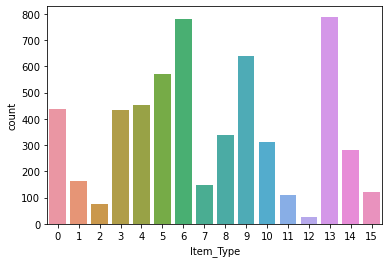

In [190]:
sns.countplot(df1['Item_Type'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

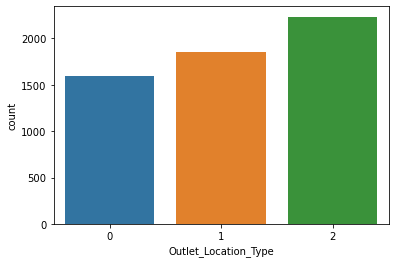

In [191]:
sns.countplot(df1['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

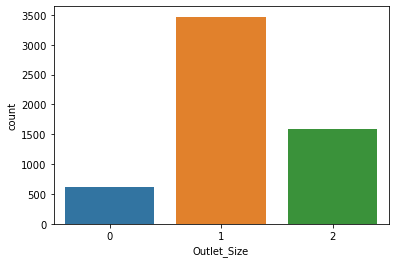

In [192]:
sns.countplot(df1['Outlet_Size'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

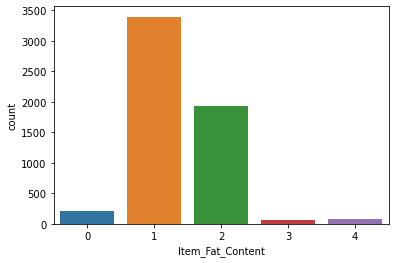

In [193]:
sns.countplot(df1['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Identifier', ylabel='Count'>

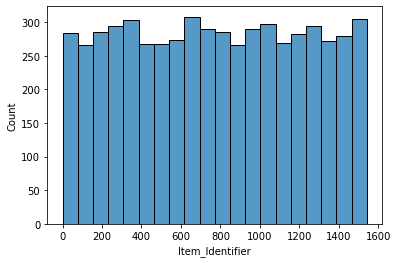

In [195]:
sns.histplot(df1['Item_Identifier'], bins=20)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Count'>

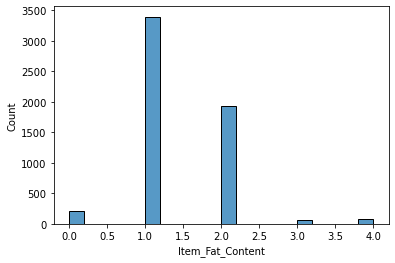

In [194]:
sns.histplot(df1['Item_Fat_Content'], bins=20)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

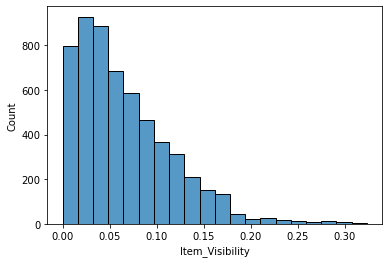

In [196]:
sns.histplot(df1['Item_Visibility'], bins=20)

<AxesSubplot:xlabel='Item_Type', ylabel='Count'>

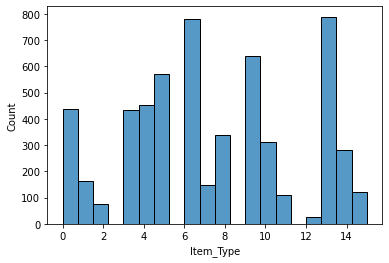

In [197]:
sns.histplot(df1['Item_Type'], bins=20)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Count'>

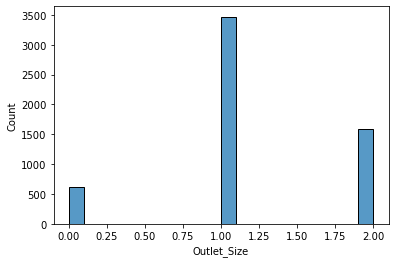

In [198]:
sns.histplot(df1['Outlet_Size'], bins=20)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Count'>

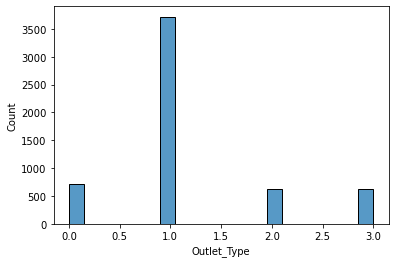

In [199]:
sns.histplot(df1['Outlet_Type'], bins=20)

<AxesSubplot:xlabel='Item_Type', ylabel='Outlet_Size'>

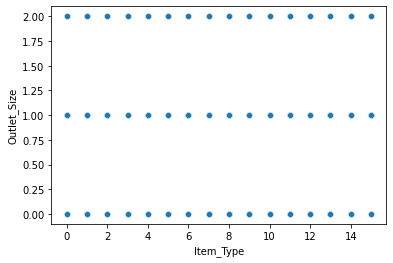

In [201]:
sns.scatterplot(x='Item_Type', y='Outlet_Size',data=df1)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Outlet_Identifier'>

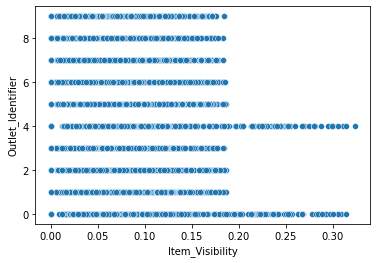

In [202]:
sns.scatterplot(x='Item_Visibility', y='Outlet_Identifier',data=df1)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Type'>

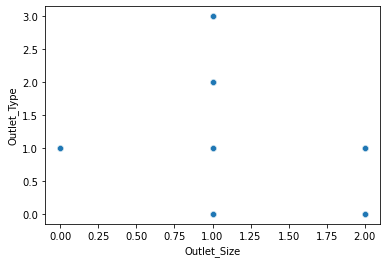

In [203]:
sns.scatterplot(x='Outlet_Size', y='Outlet_Type',data=df1)

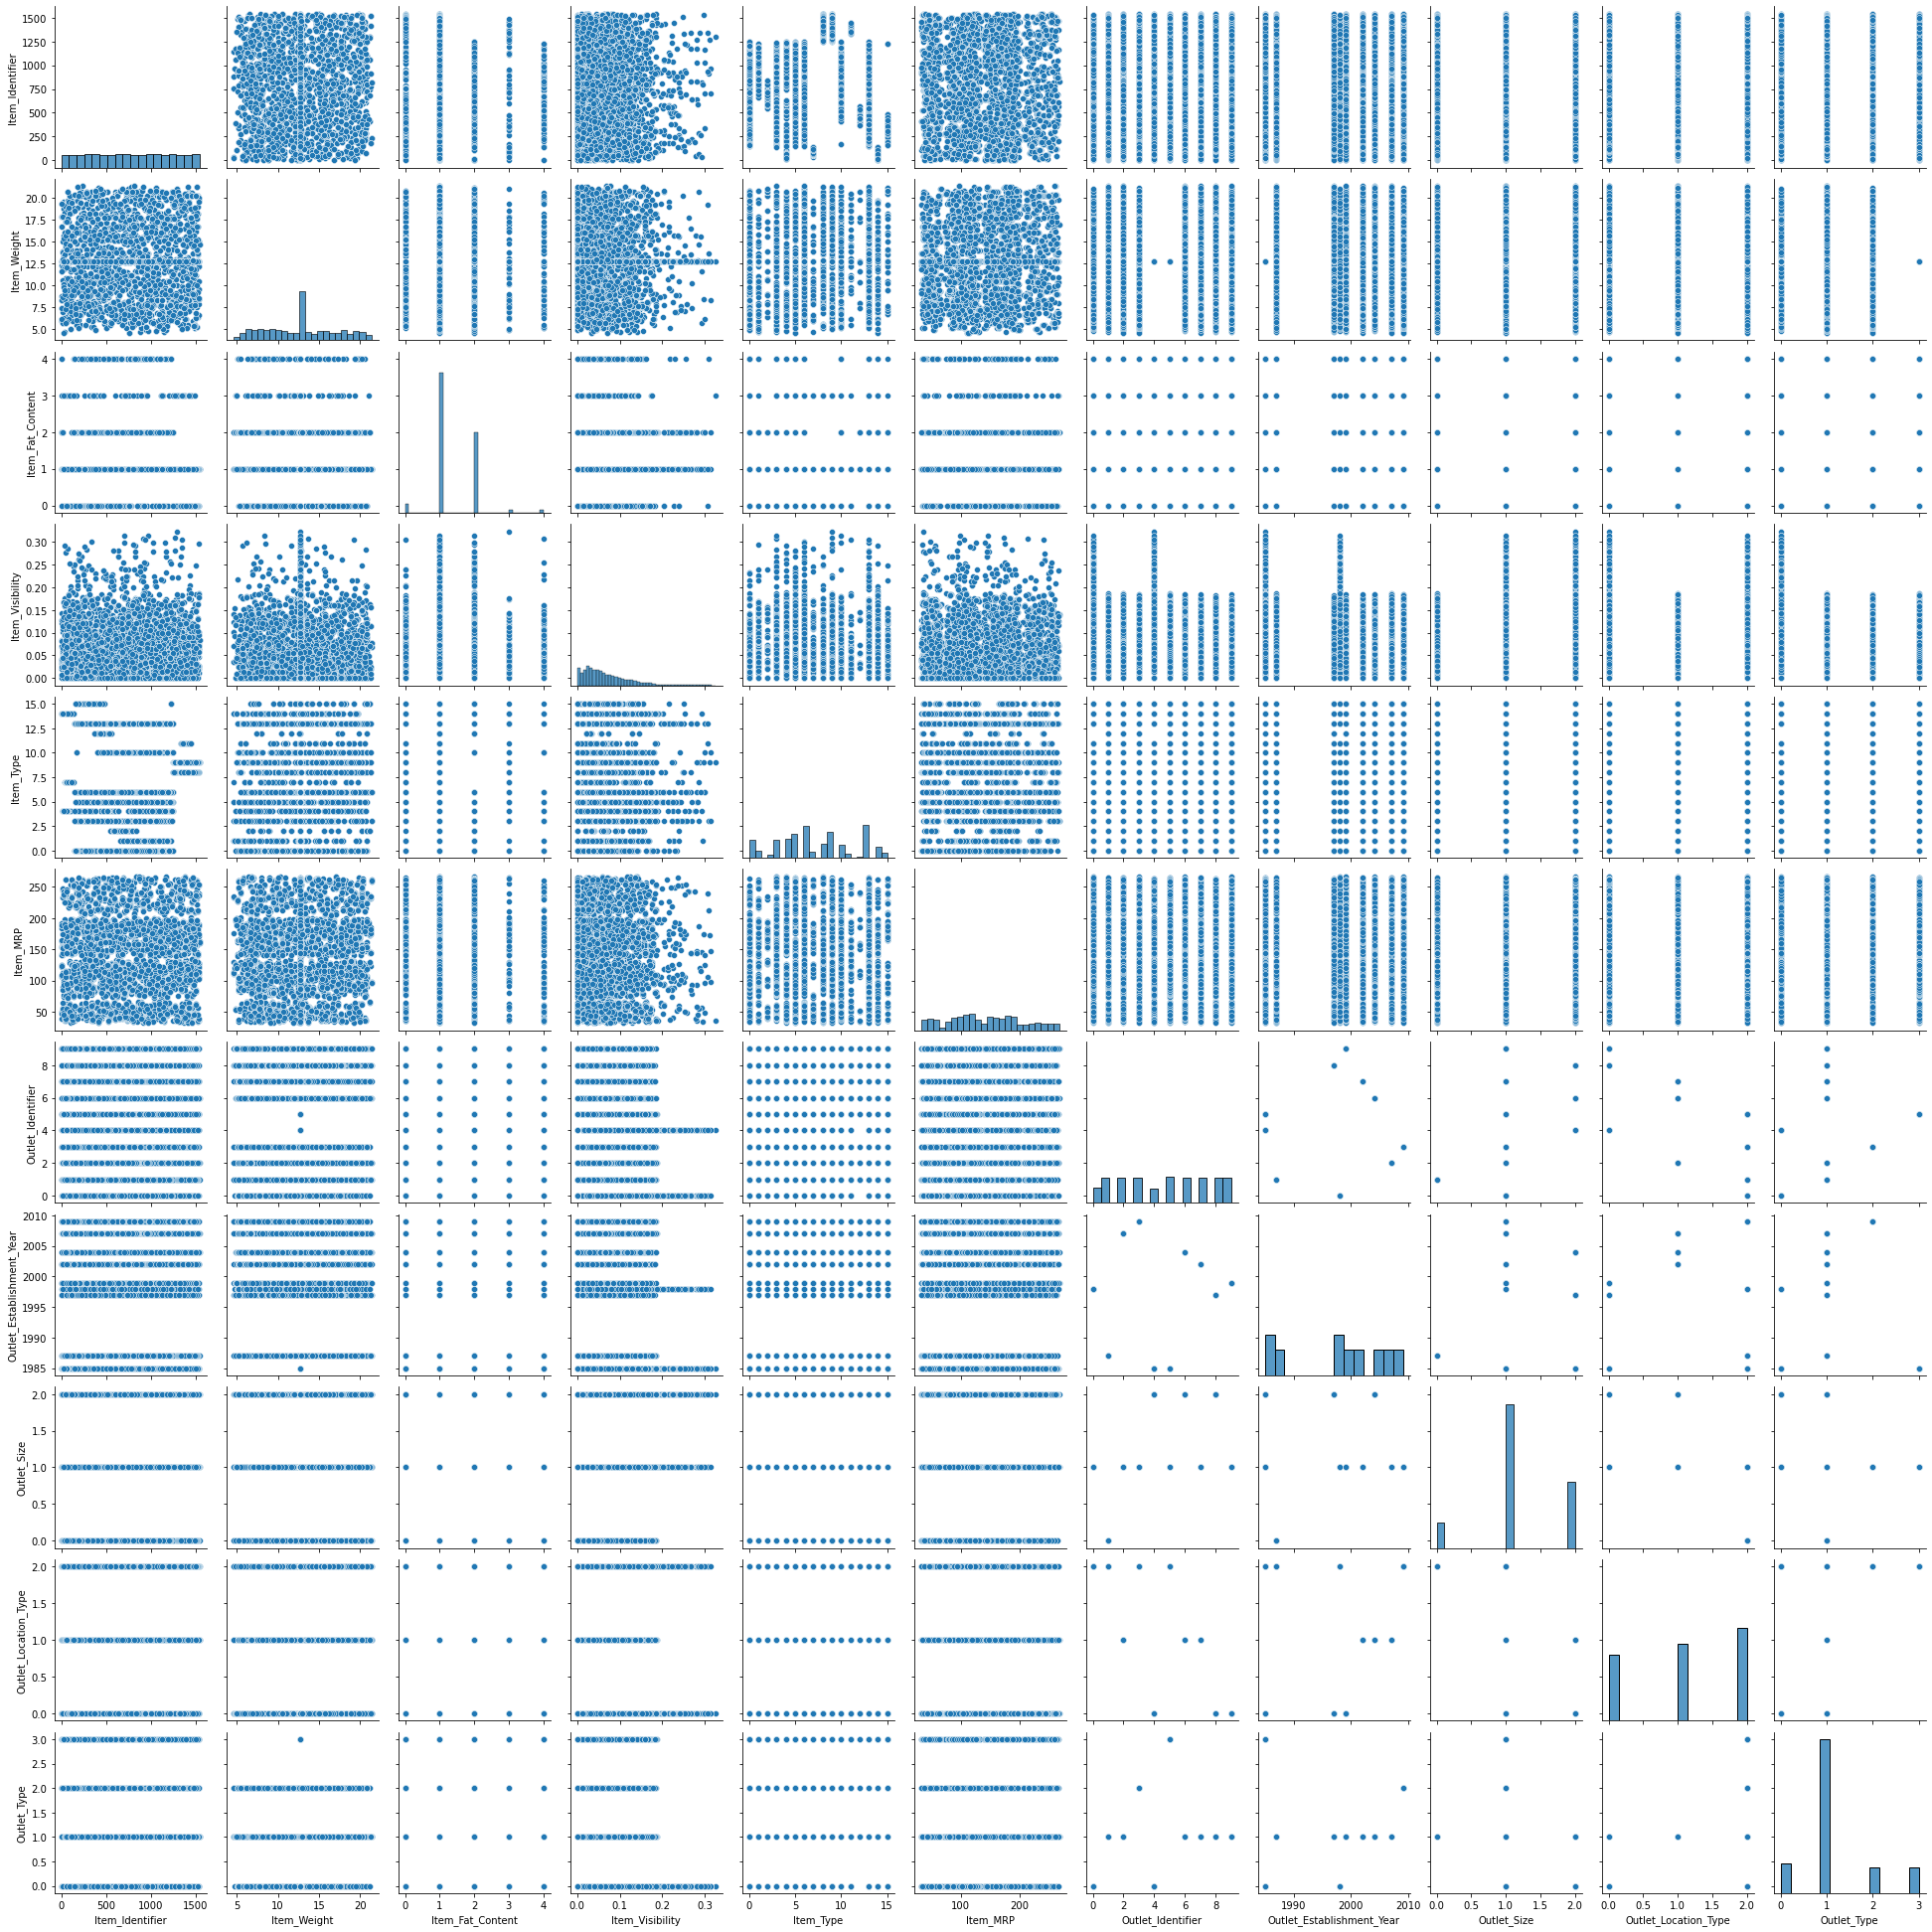

In [204]:
sns.pairplot(df1)

# Skewness

In [207]:
df1.skew()

Item_Identifier             -0.000020
Item_Weight                  0.142813
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

# Outliers Check

<AxesSubplot:>

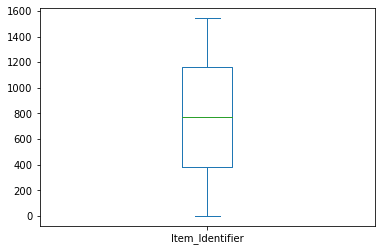

In [208]:
df1['Item_Identifier'].plot.box()

<AxesSubplot:>

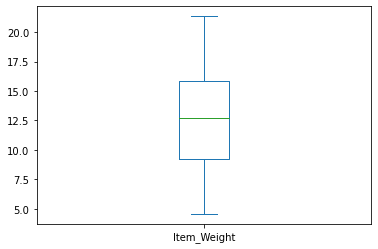

In [209]:
df1['Item_Weight'].plot.box()

<AxesSubplot:>

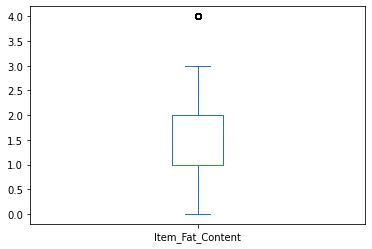

In [210]:
df1['Item_Fat_Content'].plot.box()

<AxesSubplot:>

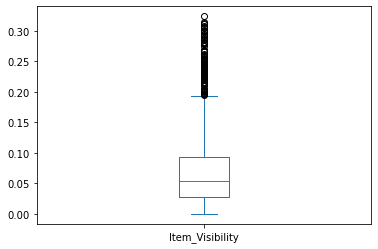

In [211]:
df1['Item_Visibility'].plot.box()

<AxesSubplot:>

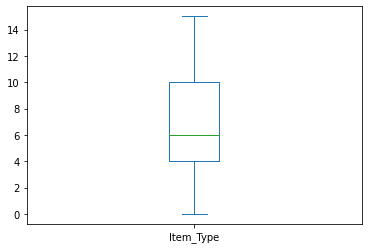

In [212]:
df1['Item_Type'].plot.box()

<AxesSubplot:>

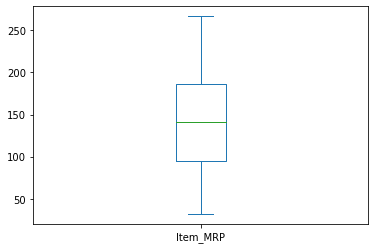

In [213]:
df1['Item_MRP'].plot.box()

<AxesSubplot:>

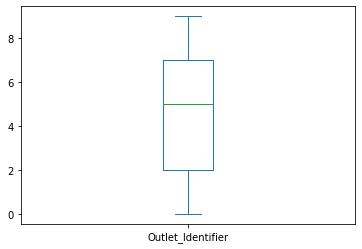

In [214]:
df1['Outlet_Identifier'].plot.box()

<AxesSubplot:>

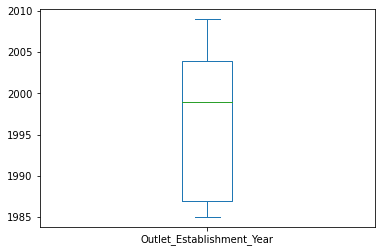

In [215]:
df1['Outlet_Establishment_Year'].plot.box()

<AxesSubplot:>

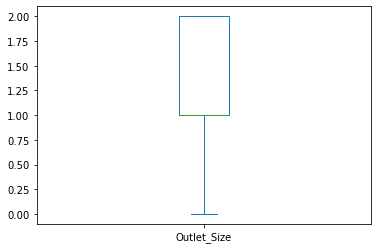

In [216]:
df1['Outlet_Size'].plot.box()

<AxesSubplot:>

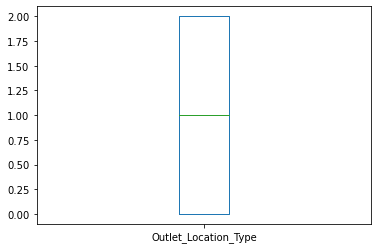

In [217]:
df1['Outlet_Location_Type'].plot.box()

<AxesSubplot:>

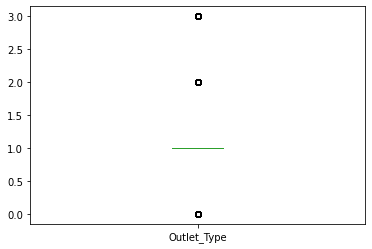

In [218]:
df1['Outlet_Type'].plot.box()

# Removing Outliers

In [220]:
from scipy.stats import zscore

In [222]:
df1zscore=np.abs(zscore(df1))
print(np.where(df1zscore>3))

(array([   1,   46,   76,   78,   89,  103,  138,  242,  333,  369,  385,
        474,  499,  543,  595,  637,  739,  783,  797,  815,  858,  871,
        985,  996, 1025, 1037, 1046, 1105, 1143, 1191, 1256, 1256, 1270,
       1284, 1314, 1321, 1411, 1422, 1437, 1516, 1539, 1547, 1577, 1616,
       1710, 1757, 1780, 1812, 1823, 1853, 1857, 1915, 1919, 1927, 2019,
       2070, 2167, 2179, 2230, 2271, 2275, 2365, 2365, 2380, 2393, 2504,
       2516, 2561, 2595, 2605, 2609, 2625, 2628, 2677, 2779, 2798, 2836,
       2843, 2866, 2915, 2926, 3039, 3077, 3097, 3267, 3294, 3313, 3316,
       3346, 3357, 3362, 3378, 3461, 3502, 3565, 3622, 3638, 3679, 3744,
       3778, 3783, 3950, 3970, 4021, 4052, 4133, 4146, 4147, 4148, 4159,
       4208, 4232, 4255, 4328, 4330, 4334, 4340, 4352, 4365, 4421, 4478,
       4542, 4575, 4616, 4616, 4689, 4692, 4726, 4801, 4804, 4845, 4846,
       4870, 4919, 4921, 4941, 4965, 4970, 4976, 4999, 5121, 5132, 5154,
       5157, 5168, 5277, 5290, 5323, 5328, 5429, 5

In [223]:
df1new=df1[(df1zscore<3).all(axis=1)]
print('df1new.shape=',df1new.shape)

df1new.shape= (5525, 11)


In [224]:
df1=df1new

In [225]:
df1

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 1         0.007565   
2                1406    14.600000                 1         0.099575   
3                 809     7.315000                 1         0.015388   
4                1184    12.695633                 2         0.118599   
5                 461     9.800000                 2         0.063817   
...               ...          ...               ...              ...   
5676              231    10.500000                 2         0.013496   
5677              306     7.600000                 2         0.142991   
5678             1412    10.000000                 1         0.073529   
5679              517    15.300000                 2         0.000000   
5680              987     9.500000                 2         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622                  9                       1999   
2            11  241.7538                  0                       1998   
3            13  155.0340                  2                       2007   
4             4  234.2300                  5                       1985   
5             6  117.1492                  8                       1997   
...         ...       ...                ...                        ...   
5676         13  141.3154                  8                       1997   
5677         15  169.1448                  3                       2009   
5678          8  118.7440                  7                       2002   
5679          3  214.6218                  2                       2007   
5680          3   79.7960                  7                       2002   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0               1                     0            1  
2               1                     2            0  
3               1                     1            1  
4               1                     2            3  
5               2                     0            1  
...           ...                   ...          ...  
5676            2                     0            1  
5677            1                     2            2  
5678            1                     1            1  
5679            1                     1            1  
5680            1                     1            1  

[5525 rows x 11 columns]

Totally 156 rows are removed because of outliers.

# Correlation of the columns

In [226]:
df1.corr()

Item_Identifier  Item_Weight  Item_Fat_Content  \
Item_Identifier                   1.000000     0.051539         -0.097746   
Item_Weight                       0.051539     1.000000         -0.040994   
Item_Fat_Content                 -0.097746    -0.040994          1.000000   
Item_Visibility                  -0.066773    -0.009738          0.027180   
Item_Type                        -0.001562     0.031620         -0.137892   
Item_MRP                          0.010357     0.043149         -0.010610   
Outlet_Identifier                 0.008498     0.019674         -0.001331   
Outlet_Establishment_Year         0.011725     0.015510         -0.001758   
Outlet_Size                       0.005119     0.017732          0.001663   
Outlet_Location_Type             -0.011669    -0.012821          0.005740   
Outlet_Type                      -0.013037     0.001905          0.006408   

                           Item_Visibility  Item_Type  Item_MRP  \
Item_Identifier                  -0.066773  -0.001562  0.010357   
Item_Weight                      -0.009738   0.031620  0.043149   
Item_Fat_Content                  0.027180  -0.137892 -0.010610   
Item_Visibility                   1.000000  -0.037048 -0.005952   
Item_Type                        -0.037048   1.000000  0.063133   
Item_MRP                         -0.005952   0.063133  1.000000   
Outlet_Identifier                -0.075154  -0.000523 -0.005557   
Outlet_Establishment_Year        -0.062646  -0.001343 -0.008645   
Outlet_Size                       0.028941  -0.004153 -0.009126   
Outlet_Location_Type              0.012099   0.000095 -0.003371   
Outlet_Type                      -0.082347   0.004759 -0.002444   

                           Outlet_Identifier  Outlet_Establishment_Year  \
Item_Identifier                     0.008498                   0.011725   
Item_Weight                         0.019674                   0.015510   
Item_Fat_Content                   -0.001331                  -0.001758   
Item_Visibility                    -0.075154                  -0.062646   
Item_Type                          -0.000523                  -0.001343   
Item_MRP                           -0.005557                  -0.008645   
Outlet_Identifier                   1.000000                   0.076189   
Outlet_Establishment_Year           0.076189                   1.000000   
Outlet_Size                         0.512023                   0.211576   
Outlet_Location_Type               -0.721108                  -0.106294   
Outlet_Type                         0.082900                  -0.143846   

                           Outlet_Size  Outlet_Location_Type  Outlet_Type  
Item_Identifier               0.005119             -0.011669    -0.013037  
Item_Weight                   0.017732             -0.012821     0.001905  
Item_Fat_Content              0.001663              0.005740     0.006408  
Item_Visibility               0.028941              0.012099    -0.082347  
Item_Type                    -0.004153              0.000095     0.004759  
Item_MRP                     -0.009126             -0.003371    -0.002444  
Outlet_Identifier             0.512023             -0.721108     0.082900  
Outlet_Establishment_Year     0.211576             -0.106294    -0.143846  
Outlet_Size                   1.000000             -0.608773    -0.193486  
Outlet_Location_Type         -0.608773              1.000000     0.475381  
Outlet_Type                  -0.193486              0.475381     1.000000

In [227]:
df1.corr().transpose()

Item_Identifier  Item_Weight  Item_Fat_Content  \
Item_Identifier                   1.000000     0.051539         -0.097746   
Item_Weight                       0.051539     1.000000         -0.040994   
Item_Fat_Content                 -0.097746    -0.040994          1.000000   
Item_Visibility                  -0.066773    -0.009738          0.027180   
Item_Type                        -0.001562     0.031620         -0.137892   
Item_MRP                          0.010357     0.043149         -0.010610   
Outlet_Identifier                 0.008498     0.019674         -0.001331   
Outlet_Establishment_Year         0.011725     0.015510         -0.001758   
Outlet_Size                       0.005119     0.017732          0.001663   
Outlet_Location_Type             -0.011669    -0.012821          0.005740   
Outlet_Type                      -0.013037     0.001905          0.006408   

                           Item_Visibility  Item_Type  Item_MRP  \
Item_Identifier                  -0.066773  -0.001562  0.010357   
Item_Weight                      -0.009738   0.031620  0.043149   
Item_Fat_Content                  0.027180  -0.137892 -0.010610   
Item_Visibility                   1.000000  -0.037048 -0.005952   
Item_Type                        -0.037048   1.000000  0.063133   
Item_MRP                         -0.005952   0.063133  1.000000   
Outlet_Identifier                -0.075154  -0.000523 -0.005557   
Outlet_Establishment_Year        -0.062646  -0.001343 -0.008645   
Outlet_Size                       0.028941  -0.004153 -0.009126   
Outlet_Location_Type              0.012099   0.000095 -0.003371   
Outlet_Type                      -0.082347   0.004759 -0.002444   

                           Outlet_Identifier  Outlet_Establishment_Year  \
Item_Identifier                     0.008498                   0.011725   
Item_Weight                         0.019674                   0.015510   
Item_Fat_Content                   -0.001331                  -0.001758   
Item_Visibility                    -0.075154                  -0.062646   
Item_Type                          -0.000523                  -0.001343   
Item_MRP                           -0.005557                  -0.008645   
Outlet_Identifier                   1.000000                   0.076189   
Outlet_Establishment_Year           0.076189                   1.000000   
Outlet_Size                         0.512023                   0.211576   
Outlet_Location_Type               -0.721108                  -0.106294   
Outlet_Type                         0.082900                  -0.143846   

                           Outlet_Size  Outlet_Location_Type  Outlet_Type  
Item_Identifier               0.005119             -0.011669    -0.013037  
Item_Weight                   0.017732             -0.012821     0.001905  
Item_Fat_Content              0.001663              0.005740     0.006408  
Item_Visibility               0.028941              0.012099    -0.082347  
Item_Type                    -0.004153              0.000095     0.004759  
Item_MRP                     -0.009126             -0.003371    -0.002444  
Outlet_Identifier             0.512023             -0.721108     0.082900  
Outlet_Establishment_Year     0.211576             -0.106294    -0.143846  
Outlet_Size                   1.000000             -0.608773    -0.193486  
Outlet_Location_Type         -0.608773              1.000000     0.475381  
Outlet_Type                  -0.193486              0.475381     1.000000

<AxesSubplot:>

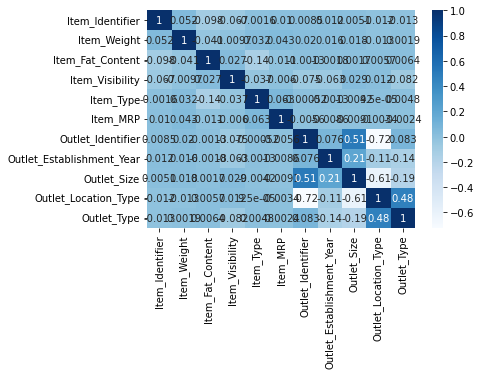

In [228]:
sns.heatmap(df1.corr(),cmap="Blues",annot=True)

# Scaling Technique

In [232]:
features1=df1
features1

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 1         0.007565   
2                1406    14.600000                 1         0.099575   
3                 809     7.315000                 1         0.015388   
4                1184    12.695633                 2         0.118599   
5                 461     9.800000                 2         0.063817   
...               ...          ...               ...              ...   
5676              231    10.500000                 2         0.013496   
5677              306     7.600000                 2         0.142991   
5678             1412    10.000000                 1         0.073529   
5679              517    15.300000                 2         0.000000   
5680              987     9.500000                 2         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622                  9                       1999   
2            11  241.7538                  0                       1998   
3            13  155.0340                  2                       2007   
4             4  234.2300                  5                       1985   
5             6  117.1492                  8                       1997   
...         ...       ...                ...                        ...   
5676         13  141.3154                  8                       1997   
5677         15  169.1448                  3                       2009   
5678          8  118.7440                  7                       2002   
5679          3  214.6218                  2                       2007   
5680          3   79.7960                  7                       2002   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0               1                     0            1  
2               1                     2            0  
3               1                     1            1  
4               1                     2            3  
5               2                     0            1  
...           ...                   ...          ...  
5676            2                     0            1  
5677            1                     2            2  
5678            1                     1            1  
5679            1                     1            1  
5680            1                     1            1  

[5525 rows x 11 columns]

In [233]:
scale=StandardScaler()
features_scale1=scale.fit_transform(features1)
features_scale1

array([[ 0.73277843,  1.88802706, -0.58694394, ..., -0.27730879,
        -1.37946133, -0.27706052],
       [ 1.41009692,  0.44460181, -0.58694394, ..., -0.27730879,
         1.09225063, -1.54319732],
       [ 0.07557832, -1.26521167, -0.58694394, ..., -0.27730879,
        -0.14360535, -0.27706052],
       ...,
       [ 1.42350917, -0.63503333, -0.58694394, ..., -0.27730879,
        -0.14360535, -0.27706052],
       [-0.57715105,  0.60889411,  1.18608245, ..., -0.27730879,
        -0.14360535, -0.27706052],
       [ 0.47347499, -0.75238498,  1.18608245, ..., -0.27730879,
        -0.14360535, -0.27706052]])

In [234]:
features_scale1.shape

(5525, 11)

In [236]:
features_scale1=features1
features1

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 1         0.007565   
2                1406    14.600000                 1         0.099575   
3                 809     7.315000                 1         0.015388   
4                1184    12.695633                 2         0.118599   
5                 461     9.800000                 2         0.063817   
...               ...          ...               ...              ...   
5676              231    10.500000                 2         0.013496   
5677              306     7.600000                 2         0.142991   
5678             1412    10.000000                 1         0.073529   
5679              517    15.300000                 2         0.000000   
5680              987     9.500000                 2         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622                  9                       1999   
2            11  241.7538                  0                       1998   
3            13  155.0340                  2                       2007   
4             4  234.2300                  5                       1985   
5             6  117.1492                  8                       1997   
...         ...       ...                ...                        ...   
5676         13  141.3154                  8                       1997   
5677         15  169.1448                  3                       2009   
5678          8  118.7440                  7                       2002   
5679          3  214.6218                  2                       2007   
5680          3   79.7960                  7                       2002   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0               1                     0            1  
2               1                     2            0  
3               1                     1            1  
4               1                     2            3  
5               2                     0            1  
...           ...                   ...          ...  
5676            2                     0            1  
5677            1                     2            2  
5678            1                     1            1  
5679            1                     1            1  
5680            1                     1            1  

[5525 rows x 11 columns]

In [257]:
conclusion=pd.DataFrame([loaded_model.predict(features)])
conclusion

0           1            2            3            4          5     \
0  1552.11296  559.025654  1777.316481  4573.659836  2143.173581  710.87466   

          6          7           8            9     ...         5515  \
0  2553.402922  988.01391  2546.75158  1918.682466  ...  4475.634102   

          5516        5517        5518         5519         5520         5521  \
0  4259.242444  1553.67759  689.509138  1208.387052  2392.042963  2722.203196   

          5522         5523         5524  
0  1942.947547  3655.894484  1601.089208  

[1 rows x 5525 columns]

In [258]:
conclusion.transpose()

0
0     1552.112960
1      559.025654
2     1777.316481
3     4573.659836
4     2143.173581
...           ...
5520  2392.042963
5521  2722.203196
5522  1942.947547
5523  3655.894484
5524  1601.089208

[5525 rows x 1 columns]